In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('iris.csv')

In [42]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.shape

(150, 6)

In [37]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


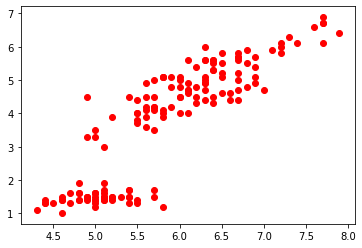

In [40]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

plt.scatter(x, y, color = 'red')


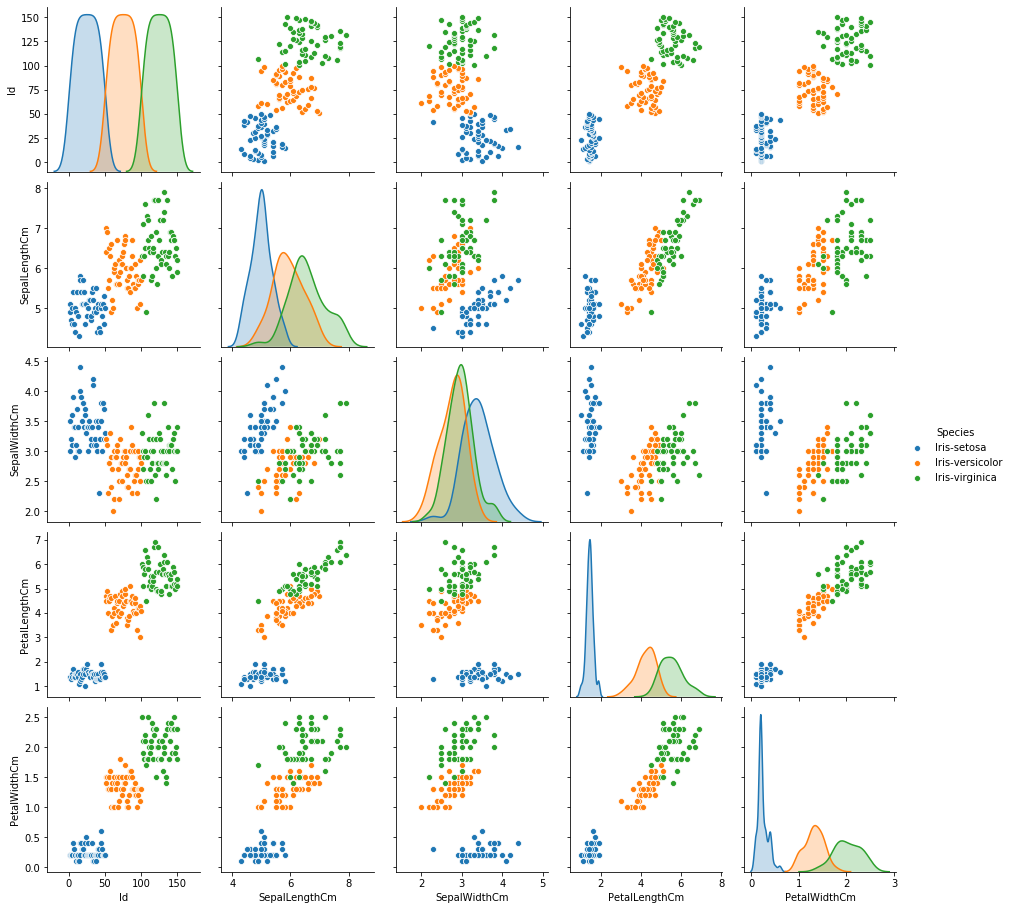

In [43]:
sns.pairplot(df, hue = 'Species')

<function matplotlib.pyplot.show(*args, **kw)>

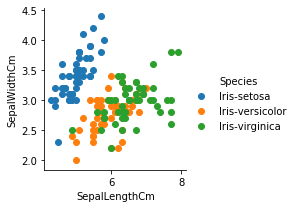

In [44]:

sns.FacetGrid(df, hue='Species', height=3) \
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
.add_legend();
plt.show

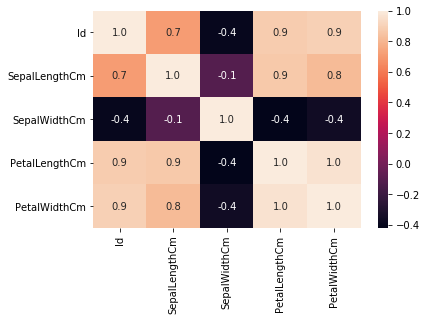

In [45]:
plt.figure()
sns.heatmap(df.corr(), fmt='.1f', annot = True)

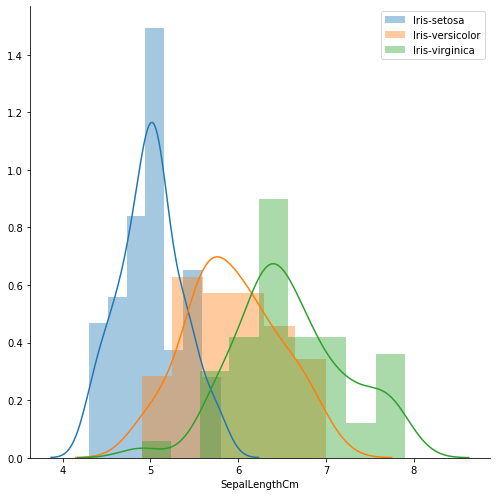

In [46]:
sns.FacetGrid(df, hue='Species', height=7)\
.map(sns.distplot, "SepalLengthCm")
plt.legend()

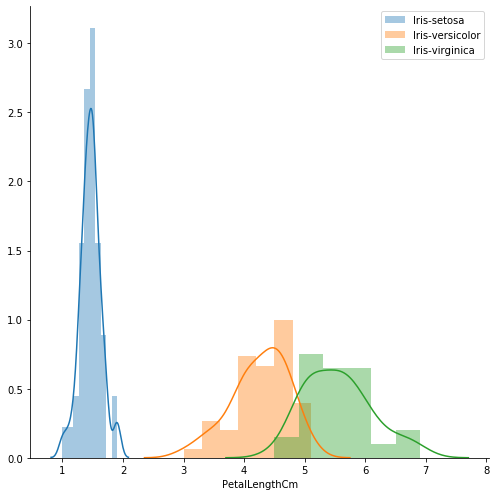

In [47]:
sns.FacetGrid(df, hue='Species', height=7)\
.map(sns.distplot, "PetalLengthCm")
plt.legend()

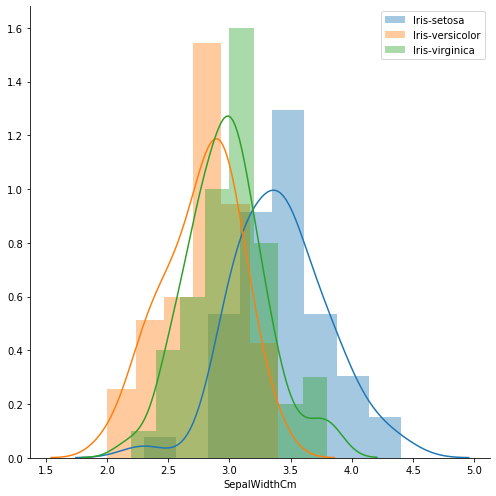

In [48]:
sns.FacetGrid(df, hue='Species', height=7)\
.map(sns.distplot, "SepalWidthCm")
plt.legend()

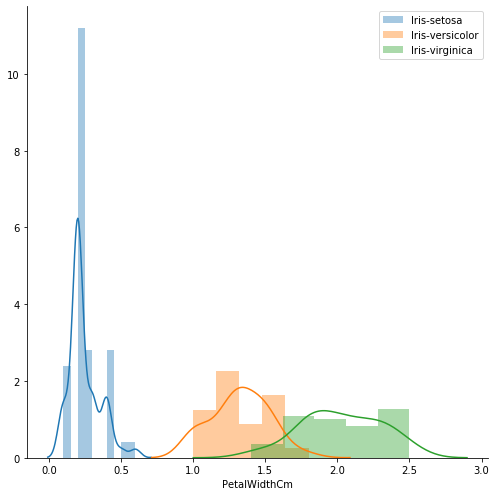

In [51]:
sns.FacetGrid(df, hue='Species', height=7)\
.map(sns.distplot, "PetalWidthCm")
plt.legend()

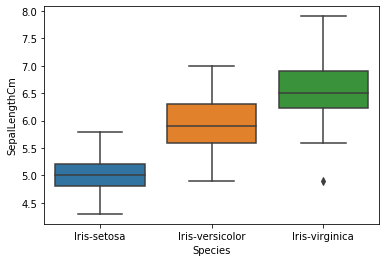

In [52]:
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)

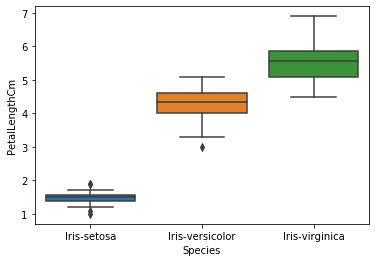

In [54]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)

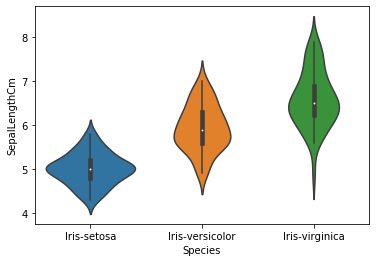

In [53]:
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df)

In [ ]:

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
print(y_kmeans)


In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Species')
plt.xlabel('x_cordinate')
plt.ylabel('y_cordinate')
plt.legend()
plt.show()